In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# from keras.layers import LSTM
# from keras.layers import Dense
# from keras.models import Sequential
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_excel('130N_Cycles_1-47.xlsx',sheetname='Specimen_RawData_1',skiprows=[0])
df.columns = ['time','load']

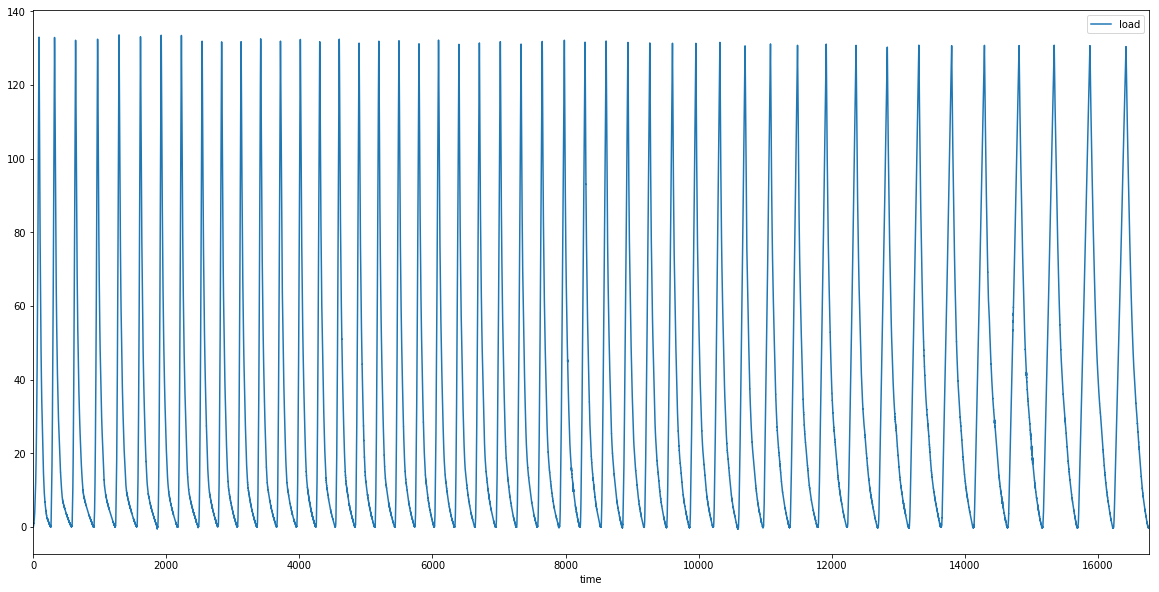

In [4]:
df.plot(y='load',x='time',figsize=(20,10))

In [5]:
from pandas.tools.plotting import autocorrelation_plot

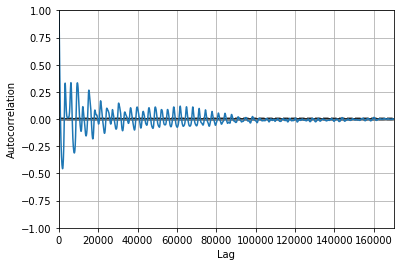

In [13]:
# autocorrelation_plot(df['load'])

In [7]:
series = df['load']
# print(series)

In [8]:
# series.index = pd.DatetimeIndex(series.index)
# print(series)
# series.index+=1
# print(series)

In [9]:
series.index = pd.to_datetime(df['time'],unit = 's')

In [10]:
model = ARIMA(series,order=(5,1,0))

In [11]:
model_fit = model.fit(disp=0)

In [12]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.load   No. Observations:               170100
Model:                 ARIMA(5, 1, 0)   Log Likelihood              293461.111
Method:                       css-mle   S.D. of innovations              0.043
Date:                Sat, 11 Nov 2017   AIC                        -586908.221
Time:                        11:39:59   BIC                        -586837.912
Sample:                    01-01-1970   HQIC                       -586887.381
                         - 01-01-1970                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.217e-06      0.005      0.001      0.999      -0.009       0.009
ar.L1.D.load     0.1892      0.002     84.102      0.000       0.185       0.194
ar.L2.D.load     0.2525      0.002    111.90

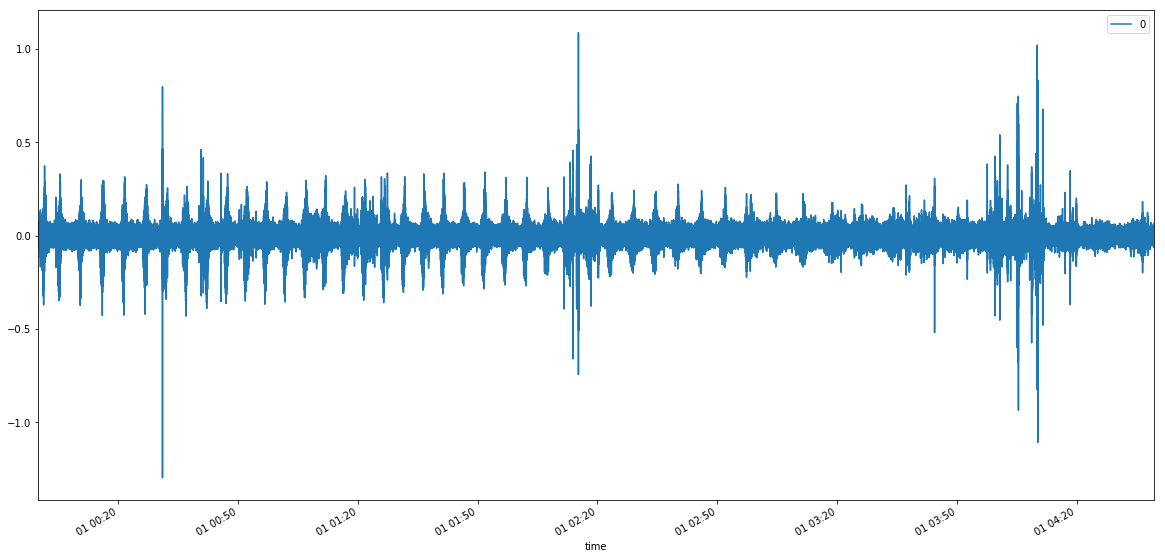

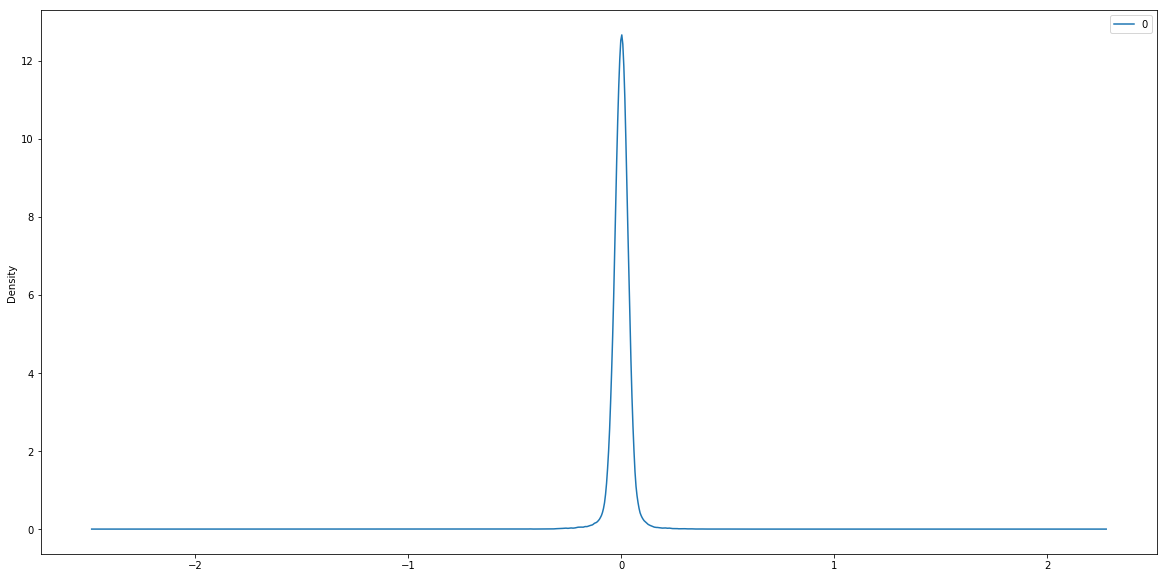

                  0
count  1.701000e+05
mean   2.533647e-07
std    4.310265e-02
min   -1.296222e+00
25%   -2.086280e-02
50%    7.687020e-04
75%    2.194373e-02
max    1.086503e+00


In [13]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(20,10))
# plt.figure(figsize=(20,10))
plt.show()
residuals.plot(kind='kde',figsize=(20,10))
plt.show()
print(residuals.describe())

### Training and Forecasting

In [15]:
df = pd.read_excel('130N_Cycles_1-47.xlsx',sheetname='Specimen_RawData_1',skiprows=[0])
df.columns = ['time','load']

In [16]:
series = df['load']
series.index = pd.to_datetime(df['time'],unit='s')

In [17]:
X = series.values

In [18]:
size = int(len(X) * 0.999)

In [19]:
train, test = X[0:size], X[size:len(X)]
history = [x  for x in train]
predictions = list()

In [20]:
for t in range(len(test)):
    model = ARIMA(history,order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('t = {}, predicted={}, expected = {}'.format(t, yhat, obs))

t = 0, predicted=[-0.04347523], expected = -0.07464
t = 1, predicted=[-0.07337786], expected = -0.06109
t = 2, predicted=[-0.07714708], expected = -0.06044
t = 3, predicted=[-0.06601003], expected = -0.04653
t = 4, predicted=[-0.04275284], expected = -0.05881
t = 5, predicted=[-0.06809297], expected = -0.09113
t = 6, predicted=[-0.09535315], expected = -0.07799
t = 7, predicted=[-0.08083991], expected = -0.092
t = 8, predicted=[-0.08789703], expected = -0.07593
t = 9, predicted=[-0.08682043], expected = -0.07896
t = 10, predicted=[-0.08505904], expected = -0.0784
t = 11, predicted=[-0.07680621], expected = -0.08221
t = 12, predicted=[-0.08516735], expected = -0.11143
t = 13, predicted=[-0.11246703], expected = -0.09438
t = 14, predicted=[-0.09951816], expected = -0.13371
t = 15, predicted=[-0.13694779], expected = -0.14519
t = 16, predicted=[-0.16403727], expected = -0.1232
t = 17, predicted=[-0.12937097], expected = -0.12117
t = 18, predicted=[-0.11561084], expected = -0.11669
t = 19,

t = 155, predicted=[-0.10098296], expected = -0.04457
t = 156, predicted=[-0.02699041], expected = -0.03088
t = 157, predicted=[-0.010205], expected = -0.03074
t = 158, predicted=[-0.03734037], expected = -0.04886
t = 159, predicted=[-0.05058497], expected = -0.01057
t = 160, predicted=[ 0.01154891], expected = -0.03553
t = 161, predicted=[-0.02523409], expected = -0.01936
t = 162, predicted=[-0.02618739], expected = 0.0022
t = 163, predicted=[ 0.01060876], expected = 0.02822
t = 164, predicted=[ 0.04830184], expected = 0.02014
t = 165, predicted=[ 0.01844177], expected = 0.02088
t = 166, predicted=[ 0.02846501], expected = 0.05239
t = 167, predicted=[ 0.07122921], expected = 0.03399
t = 168, predicted=[ 0.04674504], expected = 0.05024
t = 169, predicted=[ 0.04540178], expected = 0.06006
t = 170, predicted=[ 0.07203423], expected = 0.09558


Test MSE:0.000612742901231


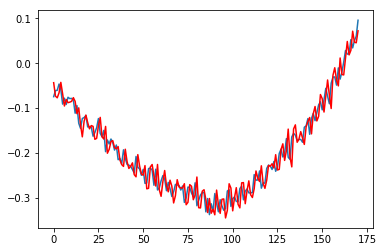

In [21]:
error = mean_squared_error(test,predictions)
print('Test MSE:{}'.format(error))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

### Forecast using predictions

In [10]:
df = pd.read_excel('130N_Cycles_1-47.xlsx',sheetname='Specimen_RawData_1',skiprows=[0])
df.columns = ['time','load']

In [11]:
series = df['load']
series.index = pd.to_datetime(df['time'],unit='s')

In [12]:
X = series.values
size = int(len(X) * 0.999)
train, test = X[0:size], X[size:len(X)]
history = [x  for x in train]
predictions = list()

In [14]:
for t in range(len(test)):
    model = ARIMA(history,order=(5,1,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = yhat
    history.append(obs)
    print('t = {}, predicted={}, expected = {}'.format(t, yhat, test[t]))

t = 0, predicted=[-0.04738509], expected = -0.07464
t = 1, predicted=[-0.05128134], expected = -0.06109
t = 2, predicted=[-0.05466689], expected = -0.06044
t = 3, predicted=[-0.05881345], expected = -0.04653
t = 4, predicted=[-0.05556472], expected = -0.05881
t = 5, predicted=[-0.0627284], expected = -0.09113
t = 6, predicted=[-0.06191734], expected = -0.07799
t = 7, predicted=[-0.0685124], expected = -0.092
t = 8, predicted=[-0.06888344], expected = -0.07593
t = 9, predicted=[-0.07233094], expected = -0.07896
t = 10, predicted=[-0.07462663], expected = -0.0784
t = 11, predicted=[-0.07682478], expected = -0.08221
t = 12, predicted=[-0.08057327], expected = -0.11143
t = 13, predicted=[-0.08214394], expected = -0.09438
t = 14, predicted=[-0.085827], expected = -0.13371
t = 15, predicted=[-0.08749833], expected = -0.14519
t = 16, predicted=[-0.09077133], expected = -0.1232
t = 17, predicted=[-0.09304702], expected = -0.12117
t = 18, predicted=[-0.09581755], expected = -0.11669
t = 19, pre

KeyboardInterrupt: 

In [ ]:
error = mean_squared_error(test,predictions)
print('Test MSE:{}'.format(error))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

### Forecasting for unseen data

In [ ]:
df = pd.read_excel('130N_Cycles_1-47.xlsx',sheetname='Specimen_RawData_1',skiprows=[0])
df.columns = ['time','load']

In [ ]:
series = df['load']
series.index = pd.to_datetime(df['time'],unit='s')

In [ ]:
X = series.values
size = int(len(X) * 1.0)
train, test = X[0:size], X[size:len(X)]
history = [x  for x in train]
predictions = list()

In [ ]:
for t in 10000:
    model = ARIMA(history,order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = yhat
    history.append(obs)
    print('t = {}, predicted={}'.format(t, yhat))

In [ ]:
plt.plot(test)
plt.show()